# TSIA202a - First Practice Session
The goal of this first practical work is to experiment the estimation of second order moments for
random processes, and to simply compare them with their theoretical version. 

Let consider the following real processes:
-  White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)
-  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")
- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ (*e.g.* `np.random.uniform`)

For each of them:
1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.
4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.





In [8]:
import numpy as np
import matplotlib.pyplot as plt

T=[10,100,500,1000]

def empiricalMean(X):
   n=len(X)
   s=0
   for k in range(n):
      s=s+X[k]
   return s/n
def empiricalAutoCov(X,k):
   n=len(X)
   mu_n= empiricalMean(X)
   s=0
   for i in range(n-k):
      s=s+(X[i]-mu_n)*np.conjugate(X[i+k]-mu_n)
   return s/n


def generateZ(sigma,n):
   Z=np.random.normal(0,sigma**2,n)
   return Z
def theoreticalMean_Z():
   return 0
def plotTheoreticalMean_Z(sigma,n,N):
   
   ETheor =[]
   for i in  range(N):
      Z=generateZ(sigma,n)
      ETheor.append(theoreticalMean_Z())
   T=np.array(range(N))
   ETheor=np.array(ETheor)
   plt.plot(T,ETheor,label=str(n)+"samples")
   plt.legend()
   
def plotEmpiricalMeanZ(sigma,n,N):

   
   EEmpir=[]
   for i in range(N):
      Z=generateZ(sigma,n)
      EEmpir.append(empiricalMean(Z))
   T=np.array(range(N))
   EEmpir = np.array(EEmpir)
   plt.xlabel("draw")
   plt.ylabel("empirical mean process 0 ")

  
   plt.plot(T,EEmpir,label=str(n)+"samples")
   plt.legend()
   
def theoreticalAutoCov_Z(k,sigma):
   if k==0:
      return sigma**2
   else:
      return 0
def plotTtheoreticalAutoCov_Z(k,sigma,n,N):
   
   ACTheor =[]
   for i in  range(N):
      Z=generateZ(sigma,n)
      ACTheor.append(theoreticalAutoCov_Z(k,sigma))
   T=np.array(range(N))
   ACTheor=np.array(ACTheor)
   plt.plot(T,ACTheor,label=str(n)+"samples")
   plt.legend()
def plotEmpiricalAutoCovZ(k,sigma,n,N):
   
   
   ACEmpir=[]
   for i in range(N):
      Z=generateZ(sigma,n)
      ACEmpir.append(empiricalAutoCov(Z,k))
   T=np.array(range(N))
   ACEmpir=np.array(ACEmpir)
   plt.xlabel("draw")
   plt.ylabel("empirical auto cov("+str(k)+")process 0 ")
   plt.plot(T,ACEmpir,label=str(n)+"samples")
   plt.legend()
   
def MSE_Z(T,Z,sigma):
   s=0
   for k in range(T):
      s=s+(theoreticalAutoCov_Z(k,sigma)-empiricalAutoCov(Z,k))**2
   return s/T
def boxplotMSE_Z(sigma):
   data=[]
   for t in T:
      datat=[]
      for i in range(100):
         Z=generateZ(sigma,t)
         datat.append(MSE_Z(t,Z,sigma))
      data.append(datat)
   fig, ax = plt.subplots()
   # build a box plot
   ax.boxplot(data)


   # title and axis labels
   ax.set_title('box plot Z')
   ax.set_xlabel('number of samples T')
   ax.set_ylabel('MSE')
   xticklabels=['10', '100', '500', '1000']
   ax.set_xticklabels(xticklabels)


   # add horizontal grid lines
   ax.yaxis.grid(True)


   # show the plot
   plt.show()
   





def generateX(sigma,a,b,n):
    Z = np.random.normal(0,sigma**2,n)
    X=np.zeros(n)
    X[0]=a+b*Z[0]
    for k in range(1,n):
      X[k]=a+b*Z[k]+Z[k-1]
    return X
def theoreticalMean_X(a):
   return a
def plotTheoreticalMean_X(sigma,a,b,n,N):
   
   ETheor =[]
   for i in  range(N):
      X=generateX(sigma,a,b,n)
      ETheor.append(theoreticalMean_X(a))
   T=np.array(range(N))
   ETheor=np.array(ETheor)
   plt.plot(T,ETheor,label=str(n)+"samples")
   plt.legend()
def plotEmpiricalMeanX(sigma,a,b,n,N):

   #N: number of samplings
   EEmpir=[]
   for i in range(N):
      X=generateX(sigma,a,b,n)
      EEmpir.append(empiricalMean(X))
   T=np.array(range(N))
   EEmpir = np.array(EEmpir)
   plt.xlabel("draw")
   plt.ylabel("empirical mean process 1 ")

  
   plt.plot(T,EEmpir,label=str(n)+"samples")
   plt.legend()

def theoreticalAutoCov_X(k,sigma,b):
   if k==0:
      return (b**2+1)*(sigma**2)
   elif k==1:
      return b*(sigma**2)
   else :
      return 0
def plotTtheoreticalAutoCov_X(k,sigma,a,b,n,N):
   
   ACTheor =[]
   for i in  range(N):
      X=generateX(sigma,a,b,n)
      ACTheor.append(theoreticalAutoCov_X(k,sigma,b))
   T=np.array(range(N))
   ACTheor=np.array(ACTheor)
   plt.plot(T,ACTheor,label=str(n)+"samples")
   plt.legend()
def plotEmpiricalAutoCovX(k,sigma,a,b,n,N):
   
   
   ACEmpir=[]
   for i in range(N):
      X=generateX(sigma,a,b,n)
      ACEmpir.append(empiricalAutoCov(X,k))
   T=np.array(range(N))
   ACEmpir=np.array(ACEmpir)
   plt.xlabel("draw")
   plt.ylabel("empirical auto cov ("+str(k)+")process 1 ")
   plt.plot(T,ACEmpir,label=str(n)+"samples")
   plt.legend()
def MSE_X(T,X,sigma,b):
   s=0
   for k in range(T):
      s=s+(theoreticalAutoCov_X(k,sigma,b)-empiricalAutoCov(X,k))**2
   return s/T
def boxplotMSE_X(sigma,a,b):
   data=[]
   for t in T:
      datat=[]
      for i in range(100):
         X=generateX(sigma,a,b,t)
         datat.append(MSE_X(t,X,sigma,b))
      data.append(datat)
   fig, ax = plt.subplots()
   # build a box plot
   ax.boxplot(data)


   # title and axis labels
   ax.set_title('box plot X')
   ax.set_xlabel('number of samples T')
   ax.set_ylabel('MSE')
   xticklabels=['10', '100', '500', '1000']
   ax.set_xticklabels(xticklabels)


   # add horizontal grid lines
   ax.yaxis.grid(True)


   # show the plot
   plt.show()
  





def generateX2(sigma,a,n,K):
   Z=generateZ(sigma,n)
   X2 = np.zeros(n)
   for i in range(n):
      for k in range(max(i-K,0),i):
         X2[i]+=Z[i-k]/(2**k)
      X2[i]+=a
   return X2
def theoreticalMean_X2(a):
   return a
def plotTheoreticalMean_X2(sigma,a,n,K,N):
   
   ETheor =[]
   for i in  range(N):
      X=generateX2(sigma,a,n,K)
      ETheor.append(theoreticalMean_X2(a))
   T=np.array(range(N))
   ETheor=np.array(ETheor)
   plt.plot(T,ETheor,label=str(n)+"samples")
   plt.legend()
def plotEmpiricalMeanX2(sigma,a,n,K,N):
   
   EEmpir=[]
   for i in range(N):
      X=generateX2(sigma,a,n,K)
      EEmpir.append(empiricalMean(X))
   T=np.array(range(N))
   EEmpir = np.array(EEmpir)
   
   plt.xlabel("draw")
   plt.ylabel("empirical mean process 2 ")

  
   plt.plot(T,EEmpir,label=str(n)+"samples")
   plt.legend()
def theoreticalAutoCov_X2(s,sigma):
   return (4/3)*(2**(-s))*(sigma)**2 #K big enough
def plotTtheoreticalAutoCov_X2(s,sigma,a,n,K,N):
   
   ACTheor =[]
   for i in  range(N):
      X=generateX2(sigma,a,n,K)
      ACTheor.append(theoreticalAutoCov_X2(s,sigma))
   T=np.array(range(N))
   ACTheor=np.array(ACTheor)
   plt.plot(T,ACTheor)
def plotEmpiricalAutoCovX2(k,sigma,a,n,K,N):
   
  
   ACEmpir=[]
   for i in range(N):
      X=generateX2(sigma,a,n,K)
      ACEmpir.append(empiricalAutoCov(X,k))
   T=np.array(range(N))
   ACEmpir=np.array(ACEmpir)
   plt.xlabel("draw")
   plt.ylabel("empirical auto cov ("+str(k)+")process 2 ")
   plt.plot(T,ACEmpir,label=str(n)+"samples")
   plt.legend()
def MSE_X2(T,X,sigma):
   s=0
   for k in range(T):
      s=s+(theoreticalAutoCov_X2(k,sigma)-empiricalAutoCov(X,k))**2
   return s/T
def boxplotMSE_X2(sigma,a,K):
   data=[]
   for t in T:
      datat=[]
      for i in range(100):
         X=generateX2(sigma,a,t,K)
         datat.append(MSE_X2(t,X,sigma))
      data.append(datat)
   fig, ax = plt.subplots()
   # build a box plot
   ax.boxplot(data)


   # title and axis labels
   ax.set_title('box plot X2')
   ax.set_xlabel('number of samples T')
   ax.set_ylabel('MSE')
   xticklabels=['10', '100', '500', '1000']
   ax.set_xticklabels(xticklabels)


   # add horizontal grid lines
   ax.yaxis.grid(True)


   # show the plot
   plt.show()





def generateX3(A0,lambda0,sigma,n):
   Z=generateZ(sigma,n)
   phi0= np.random.uniform(0,2*np.pi,n)
   X3 = np.zeros(n)
   for i in range(n):
      X3[i]=A0*np.cos(lambda0*i+phi0[i])+Z[i]
   return X3
def theoreticalMean_X3():
   return 0
def plotTheoreticalMean_X3(A0,lambda0,sigma,n,N):
   
   ETheor =[]
   for i in  range(N):
      X=generateX3(A0,lambda0,sigma,n)
      ETheor.append(theoreticalMean_X3())
   T=np.array(range(N))
   ETheor=np.array(ETheor)
   plt.plot(T,ETheor,label=str(n)+"samples")
   plt.legend()
def plotEmpiricalMeanX3(A0,lambda0,sigma,n,N):
   
   EEmpir=[]
   for i in range(N):
      X=generateX3(A0,lambda0,sigma,n)
      EEmpir.append(empiricalMean(X))
   T=np.array(range(N))
   EEmpir = np.array(EEmpir)
   
   plt.xlabel("draw")
   plt.ylabel("empirical mean process 3 ")

  
   plt.plot(T,EEmpir,label=str(n)+"samples")
   plt.legend()
def theoreticalAutoCov_X3(s,A0,sigma,lambda0):
   result=(1/2)*(A0**2)*np.cos(lambda0*s)
   if s==0:
      result+= sigma**2
   return result
   
def plotTtheoreticalAutoCov_X3(s,A0,lambda0,sigma,n,N):
   #N : number of samplings
   ACTheor =[]
   for i in  range(N):
      X=generateX3(A0,lambda0,sigma,n)
      ACTheor.append(theoreticalAutoCov_X3(s,A0,sigma,lambda0))
   T=np.array(range(N))
   ACTheor=np.array(ACTheor)
   plt.plot(T,ACTheor,label=str(n)+"samples")
   plt.legend()
def plotEmpiricalAutoCovX3(k,A0,lambda0,sigma,n,N):
   
   
   ACEmpir=[]
   for i in range(N):
      X=generateX3(A0,lambda0,sigma,n)
      ACEmpir.append(empiricalAutoCov(X,k))
   T=np.array(range(N))
   ACEmpir=np.array(ACEmpir)
   plt.xlabel("draw")
   plt.ylabel("empirical auto cov("+str(k)+") process 3 ")
   plt.plot(T,ACEmpir,label=str(n)+"samples")
   plt.legend()
def MSE_X3(T,X,A0,sigma,lambda0):
   s=0
   for k in range(T):
      s=s+(theoreticalAutoCov_X3(k,A0,sigma,lambda0)-empiricalAutoCov(X,k))**2
   return s/T
def boxplotMSE_X3(sigma,A0,lambda0):
   data=[]
   for t in T:
      datat=[]

      for i in range(100):
         X=generateX3(sigma,A0,lambda0,t)
         datat.append(MSE_X3(t,X,A0,sigma,lambda0))
      data.append(datat)
   fig, ax = plt.subplots()
   # build a box plot
   ax.boxplot(data)


   # title and axis labels
   ax.set_title('box plot X3')
   ax.set_xlabel('number of samples T')
   ax.set_ylabel('MSE')
   xticklabels=['10', '100', '500', '1000']
   ax.set_xticklabels(xticklabels)


   # add horizontal grid lines
   ax.yaxis.grid(True)


   # show the plot
   plt.show()
  




    


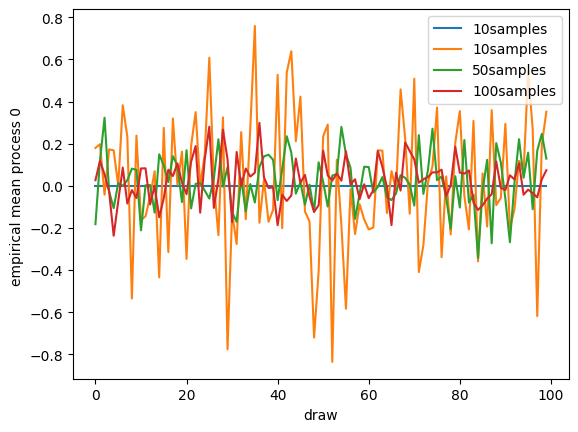

In [6]:
#Process Z
plotTheoreticalMean_Z(1,10,100) #bleu
plotEmpiricalMeanZ(1,10,100)#orange
plotEmpiricalMeanZ(1,50,100)#vert
plotEmpiricalMeanZ(1,100,100)#rouge



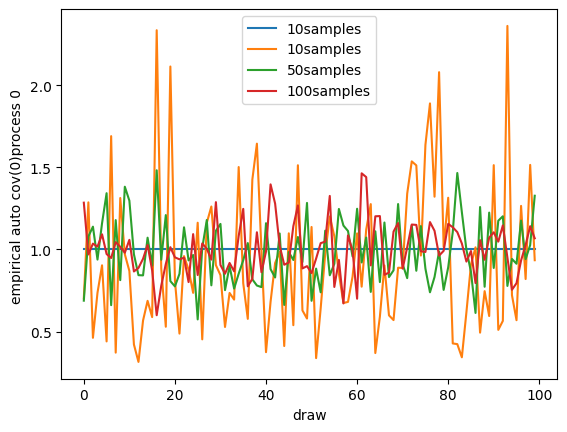

In [9]:
plotTtheoreticalAutoCov_Z(0,1,10,100)#bleu
plotEmpiricalAutoCovZ(0,1,10,100)#orange
plotEmpiricalAutoCovZ(0,1,50,100)#vert
plotEmpiricalAutoCovZ(0,1,100,100)#rouge

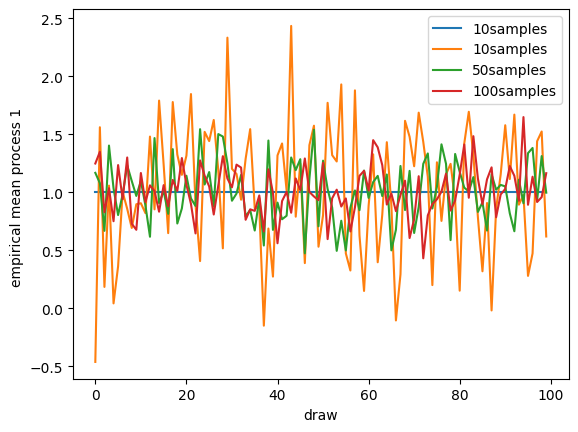

In [10]:
#Process X
plotTheoreticalMean_X(1,1,1,10,100) #bleu
plotEmpiricalMeanX(1,1,1,10,100)#orange
plotEmpiricalMeanX(1,1,1,50,100)#vert
plotEmpiricalMeanX(1,1,1,100,100)#rouge

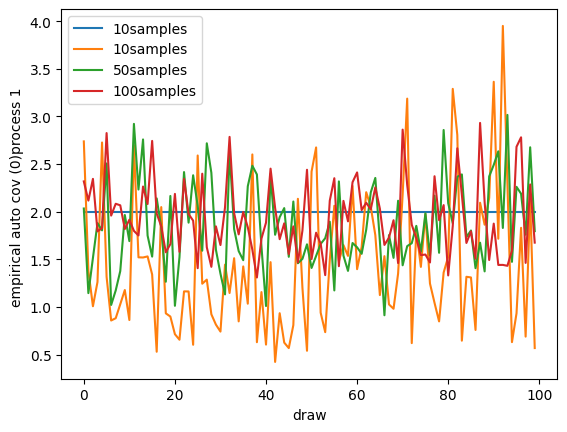

In [11]:
plotTtheoreticalAutoCov_X(0,1,1,1,10,100)#bleu
plotEmpiricalAutoCovX(0,1,1,1,10,100)#orange
plotEmpiricalAutoCovX(0,1,1,1,50,100)#vert
plotEmpiricalAutoCovX(0,1,1,1,100,100)#rouge

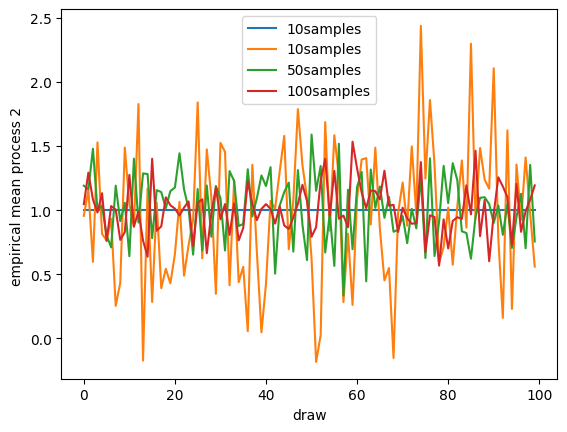

In [12]:
#Process X2
plotTheoreticalMean_X2(1,1,10,100,100) #bleu
plotEmpiricalMeanX2(1,1,10,100,100)#orange
plotEmpiricalMeanX2(1,1,50,100,100)#vert
plotEmpiricalMeanX2(1,1,100,100,100)#rouge

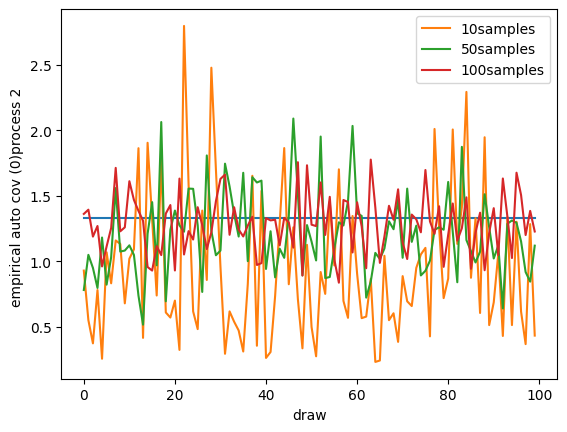

In [13]:
plotTtheoreticalAutoCov_X2(0,1,1,10,100,100)#bleu
plotEmpiricalAutoCovX2(0,1,1,10,100,100)#orange
plotEmpiricalAutoCovX2(0,1,1,50,100,100)#vert
plotEmpiricalAutoCovX2(0,1,1,100,100,100)#rouge

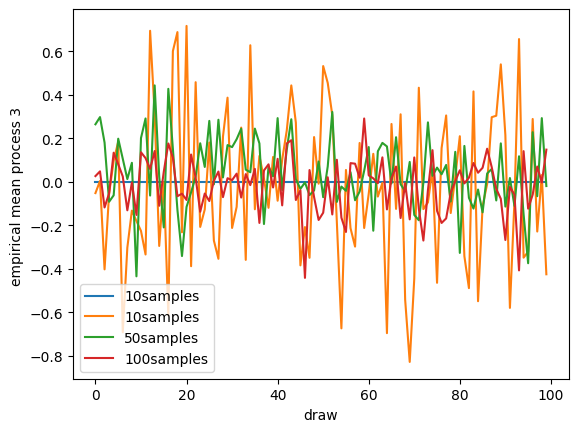

In [14]:
#Process X3
plotTheoreticalMean_X3(1,np.pi/2,1,10,100) #bleu
plotEmpiricalMeanX3(1,np.pi/2,1,10,100)#orange
plotEmpiricalMeanX3(1,np.pi/2,1,50,100)#vert
plotEmpiricalMeanX3(1,np.pi/2,1,100,100)#rouge

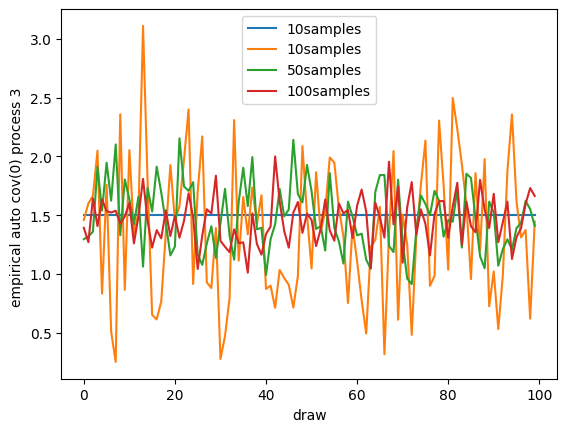

In [15]:
plotTtheoreticalAutoCov_X3(0,1,np.pi/2,1,10,100)#bleu
plotEmpiricalAutoCovX3(0,1,np.pi/2,1,10,100)#orange
plotEmpiricalAutoCovX3(0,1,np.pi/2,1,50,100)#vert
plotEmpiricalAutoCovX3(0,1,np.pi/2,1,100,100)#rouge

We see that the empirical operators are oscillating around the theoretical value. Also, 
the amplitude of oscillations around the theoretical value decreases when the number of taken samples increases. 

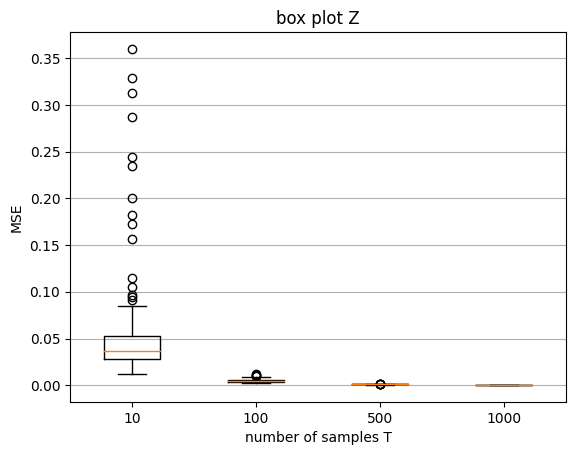

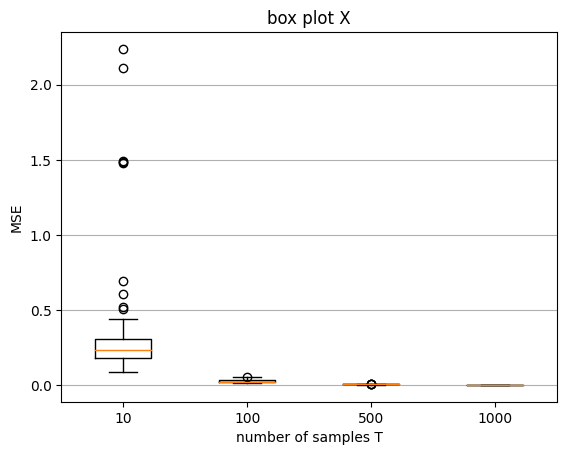

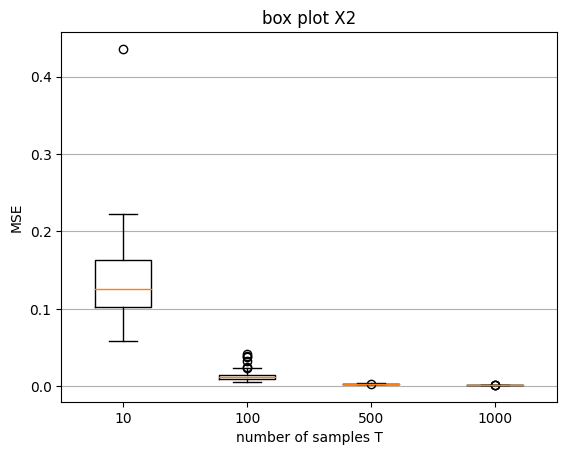

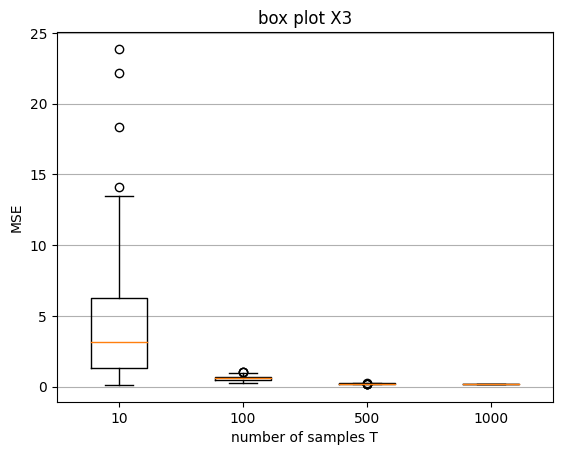

In [16]:
boxplotMSE_Z(1)
boxplotMSE_X(1,1,1)
boxplotMSE_X2(1,1,100)
boxplotMSE_X3(1,1,np.pi/2)

We see that the value of MSE decreases when the number of samples taken into consideration increases.